<a href="https://colab.research.google.com/github/mz-zarei/TimeSeriesAnalysis/blob/main/PedestrianFlowForecasting/PedCrossVolumeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os

# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline

In [38]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/20180525-20200416-Milton-Ped-Volume-Per-Crosswalk.csv', delimiter=';')
# # Combine date/time columns and change the type to datetime 
df['date'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')
# Set index as date column and sort
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
# Drop unused columns
df.drop(columns=['latitude', 'longitude', 'time'], inplace=True)
# Show first 10 rows
df.head(10)

,id,name,vol_vehicle,ped_N,ped_S,ped_E,ped_W
date,,,,,,,
2018-05-25 15:00:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,351,0,0,0,0
2018-05-25 15:15:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,597,0,0,0,0
2018-05-25 15:30:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,612,0,0,0,0
2018-05-25 15:45:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,702,0,0,0,0
2018-05-25 16:00:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,639,0,0,0,0
2018-05-25 16:15:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,648,0,0,0,0
2018-05-25 16:30:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,658,0,0,0,0
2018-05-25 16:45:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,703,0,0,0,0
2018-05-25 17:00:00,af48a872-12a8-4142-be64-8f6cf84e58f9,Thompson Road and McCuaig Drive,756,0,0,0,0


In [39]:
# Check if there is any Null target values
print('Number of null values (ped_N): {0}'.format(df.ped_N.isnull().sum()))
print('Number of null values (ped_S): {0}'.format(df.ped_S.isnull().sum()))
print('Number of null values (ped_E): {0}'.format(df.ped_E.isnull().sum()))
print('Number of null values (ped_W): {0}'.format(df.ped_W.isnull().sum()))

Number of null values (ped_N): 0
Number of null values (ped_S): 0
Number of null values (ped_E): 0
Number of null values (ped_W): 0
Duplicate dates in our data (before):  730696


In [116]:
# Resample data to get daily or weekly or monthly counts
df_r = df.resample('D').sum()

# Check for duplicate index values
print('Duplicate dates in our data (before): ', df_r.index.duplicated().sum())

Duplicate dates in our data (before):  0


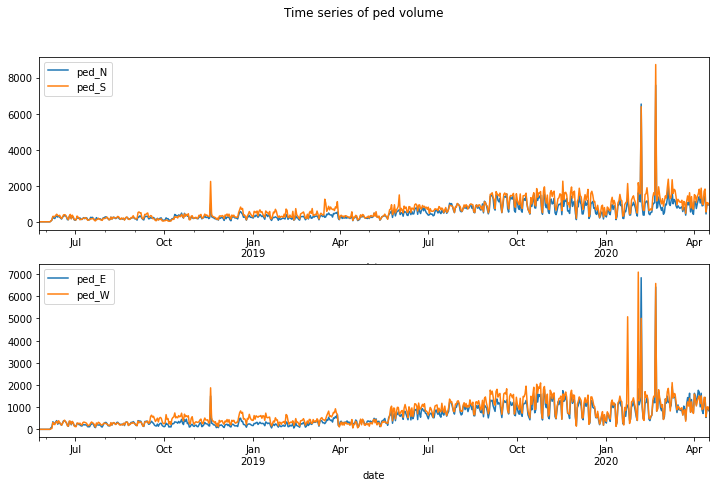

In [117]:
# Plotting the time series of Ped counts for each crossing
fig, axs = plt.subplots(2, figsize=(12, 7))
fig.suptitle('Time series of ped volume')

df_r.ped_N.plot(ax=axs[0])
df_r.ped_S.plot(ax=axs[0])
axs[0].legend()

df_r.ped_E.plot(ax=axs[1])
df_r.ped_W.plot(ax=axs[1])
axs[1].legend()

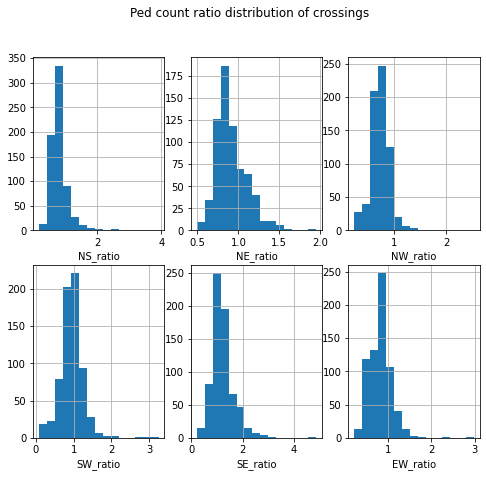

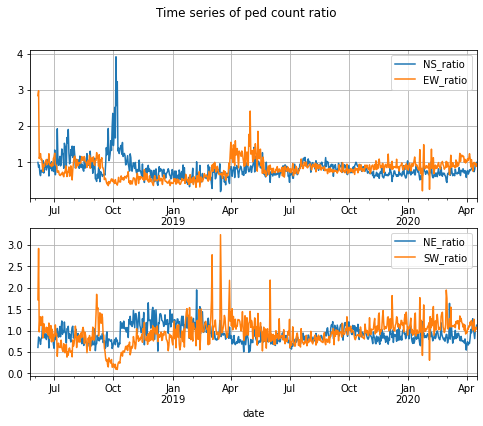

In [118]:
# Calculate the ratio of crossing counts
df_r['NS_ratio'] = df_r['ped_N'] / df_r['ped_S']
df_r['NE_ratio'] = df_r['ped_N'] / df_r['ped_E']
df_r['NW_ratio'] = df_r['ped_N'] / df_r['ped_W']
df_r['SW_ratio'] = df_r['ped_S'] / df_r['ped_W']
df_r['SE_ratio'] = df_r['ped_S'] / df_r['ped_E']
df_r['EW_ratio'] = df_r['ped_E'] / df_r['ped_W']

# Plot the distribution of ratios
fig, axs = plt.subplots(2,3, figsize=(8, 7))
fig.suptitle('Ped count ratio distribution of crossings')

for i, data in enumerate(['NS_ratio', 'NE_ratio', 'NW_ratio', 'SW_ratio', 'SE_ratio', 'EW_ratio']):
    if i <=2:
        df_r[data].hist(ax=axs[0,i], bins=15)
        axs[0, i].set_xlabel(data)
    else:
        df_r[data].hist(ax=axs[1,i-3], bins=15)
        axs[1, i-3].set_xlabel(data)


# Plotting the time series of Ped counts ratios
fig, axs = plt.subplots(2, figsize=(8, 6))
fig.suptitle('Time series of ped count ratio')

df_r.NS_ratio.plot(ax=axs[0])
df_r.EW_ratio.plot(ax=axs[0])
df_r.NE_ratio.plot(ax=axs[1])
df_r.SW_ratio.plot(ax=axs[1])
for i in range(2):
    axs[i].legend()
    axs[i].grid()